In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import numpy as np
raw_df=pd.read_csv('train_emotion.csv')
raw_df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [3]:
raw_df=raw_df.sample(350000)

In [4]:
# Drop rows with missing values
raw_df.dropna(inplace=True)

# Split the data into question pairs and labels
questions = raw_df[['question1', 'question2']]
labels = raw_df['is_duplicate']

In [5]:
questions

,question1,question2
346276,Which book is best for power systems?,What is the best book to refer to about power ...
164056,What all preparation do I need to do to clear ...,What should be the plan for preparation of CAT...
186213,What is the procedure for renewal of mudra loan?,What is the procedure of interest rate on loan...
173057,How do I lose weight fast?,How do I lose 30 kilos fast?
87513,"Tests and my curiosity indicate I am gifted, b...",How can I learn empathy and curiosity about ot...
...,...,...
254852,Is anal sex harmful for health of both the par...,Why is Hong Kong rape law only lawful upon mal...
230246,Of all the things that were said to you out of...,Of all the things that were said to you out of...
191637,Who is founder of examtravel.com?,Who is the founder of Jugaadugar.com?
351752,Why are food so expensive in the airports? Are...,Why is airport food so expensive?


In [6]:
labels

346276    1
164056    1
186213    0
173057    1
87513     0
         ..
254852    0
230246    0
191637    0
351752    1
237122    1
Name: is_duplicate, Length: 349997, dtype: int64

In [7]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [8]:
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [9]:
questions['question1']=questions['question1'].apply(transform_text)


C:\Users\himan\AppData\Local\Temp\ipykernel_18312\3438459789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions['question1']=questions['question1'].apply(transform_text)


In [10]:
questions['question2']=questions['question2'].apply(transform_text)


C:\Users\himan\AppData\Local\Temp\ipykernel_18312\3344618854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions['question2']=questions['question2'].apply(transform_text)


In [11]:
questions

,question1,question2
346276,book best power system,best book refer power system
164056,prepar need clear cat 2017,plan prepar cat 2017 onward
186213,procedur renew mudra loan,procedur interest rate loan taken bank interes...
173057,lose weight fast,lose 30 kilo fast
87513,test curios indic gift other seem learn often ...,learn empathi curios peopl
...,...,...
254852,anal sex harm health partner male femal,hong kong rape law law upon male lot case fema...
230246,thing said guilt stand,thing said infatu stand
191637,founder,founder
351752,food expens airport play monopoli rent expens,airport food expens


In [12]:
from sklearn.model_selection import train_test_split


In [13]:
english_stopwords = stopwords.words('english')


In [14]:
questions_train, questions_test, labels_train, labels_test = train_test_split(questions, labels, test_size=0.2, random_state=42)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)

In [16]:
questions_train = tfidf.fit_transform(questions_train['question1'] + ' ' + questions_train['question2'])
questions_test=tfidf.transform(questions_test['question1'] + ' ' + questions_test['question2'])

In [17]:
questions_train.shape

(279997, 1000)

In [18]:
questions_test.shape

(70000, 1000)

In [19]:
labels_train.shape

(279997,)

In [20]:
labels_test.shape

(70000,)

In [21]:
questions_train

<279997x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1436691 stored elements in Compressed Sparse Row format>

In [22]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

In [23]:
train_tensors = F.normalize(torch.tensor(questions_train.toarray()).float(), dim=1)
val_tensors = F.normalize(torch.tensor(questions_test.toarray()).float(), dim=1)

In [24]:
train_tensors.shape, val_tensors.shape


(torch.Size([279997, 1000]), torch.Size([70000, 1000]))

In [25]:
type(labels_train)


pandas.core.series.Series

In [26]:
labels_train=np.array(labels_train)


In [27]:
labels_test=np.array(labels_test)

In [28]:
train_ds = TensorDataset(train_tensors, torch.tensor(labels_train))
val_ds = TensorDataset(val_tensors, torch.tensor(labels_test))

In [29]:
len(train_ds)


279997

In [30]:
len(val_ds)

70000

In [31]:
batch_size = 128
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size)

In [32]:
for inputs_batch, targets_batch in train_dl:
    print('inputs.shape', inputs_batch.shape)
    print('targets.shape', targets_batch.shape)
    print(targets_batch)
    break

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
tensor([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0])


In [33]:
import torch.nn as nn


In [34]:
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1000, 1)
        
    def forward(self, xb):
        out = self.linear1(xb)
        return out

In [35]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

In [36]:
logreg_model = LogReg()


In [37]:
for batch in val_dl:
    batch_inputs, batch_targets = batch
    print('inputs.shape', batch_inputs.shape)
    print('targets', batch_targets)
    
    batch_out = logreg_model(batch_inputs)
    probs = torch.sigmoid(batch_out[:,0])
    preds = (probs >= 0.5).int()
    
    print('outputs', preds)
    print('accuracy', accuracy_score(batch_targets, preds))
    print('f1_score', f1_score(batch_targets, preds))
    break

inputs.shape torch.Size([128, 1000])
targets tensor([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 0])
outputs tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)
accuracy 0.4140625
f1_score 0.5714285714285715


In [38]:
def evaluate(model, dl):
    losses, accs, f1s = [], [], []
    for batch in dl:
        inputs, targets = batch
        out = model(inputs)
        
        probs = torch.sigmoid(out[:,0])
        loss = F.binary_cross_entropy(probs, targets.float(), weight=torch.tensor(20.))
        losses.append(loss.item())

        preds = (probs > 0.5).int()
        acc = accuracy_score(targets, preds)
        f1 = f1_score(targets, preds)
        
        accs.append(acc)
        f1s.append(f1)

    return np.mean(losses), np.mean(accs), np.mean(f1s)

In [39]:
history = [] # for recording epoch-wise results

In [40]:
def fit(epochs, lr, model, train_loader, val_loader):
    optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            inputs, targets = batch
            out = model(inputs)
            probs = torch.sigmoid(out[:,0])
            loss = F.binary_cross_entropy(probs, 
                                          targets.float(), 
                                          weight=torch.tensor(20.))
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        loss, acc, f1 = result
        print('Epoch: {}; Loss: {:.4f}; Accuracy: {:.4f}; F1 Score: {:.4f}'.format(
            epoch, loss, acc, f1))
        history.append(result)

In [41]:
logreg_model = LogReg()


In [42]:
for batch in val_dl:
    batch_inputs, batch_targets = batch
    print('inputs.shape', batch_inputs.shape)
    print('targets', batch_targets)
    
    batch_out = logreg_model(batch_inputs)
    probs = torch.sigmoid(batch_out[:,0])
    preds = (probs >= 0.5).int()
    
    print('outputs', preds)
    print('accuracy', accuracy_score(batch_targets, preds))
    print('f1_score', f1_score(batch_targets, preds))
    break

inputs.shape torch.Size([128, 1000])
targets tensor([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 0])
outputs tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)
accuracy 0.390625
f1_score 0.5411764705882353


In [43]:
history


[]

In [44]:
fit(5, 0.01, logreg_model, train_dl, val_dl)


Epoch: 0; Loss: 11.2910; Accuracy: 0.7036; F1 Score: 0.5285
Epoch: 1; Loss: 11.2736; Accuracy: 0.7015; F1 Score: 0.5218
Epoch: 2; Loss: 11.2707; Accuracy: 0.7025; F1 Score: 0.5239
Epoch: 3; Loss: 11.2661; Accuracy: 0.7017; F1 Score: 0.5272
Epoch: 4; Loss: 11.2778; Accuracy: 0.7016; F1 Score: 0.5363


In [45]:
fit(5, 0.01, logreg_model, train_dl, val_dl)


Epoch: 0; Loss: 11.2733; Accuracy: 0.7013; F1 Score: 0.5138
Epoch: 1; Loss: 11.2714; Accuracy: 0.7019; F1 Score: 0.5303
Epoch: 2; Loss: 11.2703; Accuracy: 0.7028; F1 Score: 0.5253
Epoch: 3; Loss: 11.2754; Accuracy: 0.7029; F1 Score: 0.5275
Epoch: 4; Loss: 11.2771; Accuracy: 0.7011; F1 Score: 0.5210


In [46]:
fit(5, 0.01, logreg_model, train_dl, val_dl)


Epoch: 0; Loss: 11.2697; Accuracy: 0.7019; F1 Score: 0.5211
Epoch: 1; Loss: 11.2779; Accuracy: 0.7015; F1 Score: 0.5185
Epoch: 2; Loss: 11.2723; Accuracy: 0.7024; F1 Score: 0.5326
Epoch: 3; Loss: 11.2799; Accuracy: 0.7023; F1 Score: 0.5156
Epoch: 4; Loss: 11.2729; Accuracy: 0.7010; F1 Score: 0.5248


In [47]:
losses = [item[0] for item in history]


In [48]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Loss')

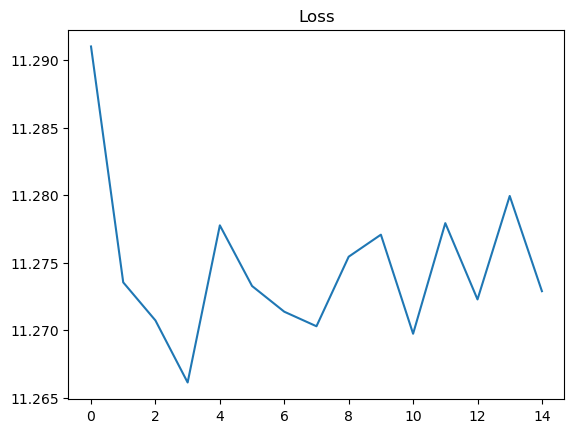

In [49]:
plt.plot(losses);
plt.title('Loss')

In [50]:
f1s = [item[2] for item in history]


Text(0.5, 1.0, 'F1 Score')

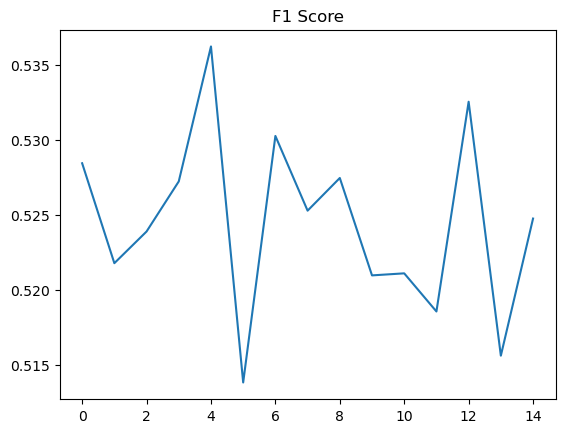

In [51]:
plt.plot(f1s)
plt.title('F1 Score')

In [52]:
import torch.nn.functional as F


# FeedForwardModel

In [53]:
class FeedForwardModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1000, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 1)
        
    def forward(self, xb):
        out = F.relu(self.linear1(xb))
        out = F.relu(self.linear2(out))
        out = F.relu(self.linear3(out))
        out = self.linear4(out)
        return out

In [54]:
ff_model = FeedForwardModel()


In [55]:
history = [evaluate(ff_model, val_dl)]


In [56]:
history


[(13.72232848591081, 0.6304599764951684, 0.0)]

In [57]:
fit(5, 0.001, ff_model, train_dl, val_dl)


Epoch: 0; Loss: 10.0812; Accuracy: 0.7475; F1 Score: 0.5785
Epoch: 1; Loss: 9.7319; Accuracy: 0.7618; F1 Score: 0.6287
Epoch: 2; Loss: 9.6932; Accuracy: 0.7686; F1 Score: 0.6463
Epoch: 3; Loss: 10.0994; Accuracy: 0.7702; F1 Score: 0.6535
Epoch: 4; Loss: 10.9897; Accuracy: 0.7666; F1 Score: 0.6586


In [61]:
test_df=pd.read_csv('test_quora.csv')
test_df

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
2345791,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
2345792,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
2345793,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
2345794,2345794,What were the best and worst things about publ...,What are the best and worst things examination...


In [63]:
test_df.dropna(inplace=True)


In [64]:
test_inputs = tfidf.transform(test_df['question1'] + ' ' + test_df['question2'])

In [65]:
test_tensors = torch.tensor(test_inputs.toarray()).float()


In [66]:
test_ds = TensorDataset(test_tensors)


In [67]:
test_dl = DataLoader(test_ds, batch_size)


In [68]:
def predict(model, dl):
    all_preds = []
    for batch in dl:
        inputs, = batch
        out = model(inputs)
        probs = torch.sigmoid(out)[:,0]
        preds = (probs > 0.5).int()
        all_preds += list(preds.numpy())
    return all_preds

In [69]:
test_preds = predict(ff_model, test_dl)


In [80]:
len(test_preds)

2345790

In [70]:
test_preds[:20]


[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]